In [1]:
!pip install -i https://pypi.tuna.tsinghua.edu.cn/simple plotly
!pip install -i https://pypi.tuna.tsinghua.edu.cn/simple cufflinks

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=6241 sha256=d619a9ab40b542d7a1d4cbdeed429b86c597c9ee3a7a020e1fa7d10b622aa8f7
  Stored in directory: c:\users\jackh\appdata\local\pip\cache\wheels\fd\6a\e5\02b1d1ad49a049926bba3ddddee43fa2bc8ce22637373041f2
Successfully built retrying
Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
  Created wheel for cufflinks: filename=cufflinks-0.17.3-py3-none-any.whl size=67932 sha256=9a9d0e544808643742a3f91fbd36ee006730143f034d1b2a6f8263743d6e75b8
  Stored in directory: c:\users\jackh\appdata\local\pip\cache\wheels\f2\7b\f5\d76edf0f47aae04398503aa4197579f1dfab59c7962f6e06a6
Successfully built cufflinks


In [3]:
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns
color = sns.color_palette()
import plotly.offline as py
py.init_notebook_mode(connected=True)
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import pandas as pd
import plotly.offline as offline
offline.init_notebook_mode()
# from plotly import tools
# import plotly.tools as tls
# import squarify
# from mpl_toolkits.basemap import Basemap
# from numpy import array
# from matplotlib import cm

# import cufflinks and offline mode
import cufflinks as cf
cf.go_offline()
plt.style.use('fivethirtyeight')

In [117]:
app_train = pd.read_csv('D:/code/Bank Loan Customer Default Risk Prediction/data/application_train.csv')
app_test = pd.read_csv('D:/code/Bank Loan Customer Default Risk Prediction/data/application_test.csv')
bureau = pd.read_csv('D:/code/Bank Loan Customer Default Risk Prediction/data/bureau.csv')
previous_application = pd.read_csv('D:/code/Bank Loan Customer Default Risk Prediction/data/previous_application.csv')

In [55]:
#定义缺失值检测函数
def missing_values_table(df):
        # 总缺失值
        mis_val = df.isnull().sum()
        # 缺失值百分比
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        # 将总缺失值和缺失值百分比合并
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        # 重命名两列
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        # 切片第一列全部行中不为零的值，之后按照'% of Total Values'降序排列，小数点保留一位
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        # 信息汇总，shape[1]计数列，shape[0]计数行
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")   
        # 输出 dataframe
        return mis_val_table_ren_columns

In [56]:
missing_values = missing_values_table(app_train)
missing_values.head(20)

Your selected dataframe has 122 columns.
There are 67 columns that have missing values.


Missing Values  % of Total Values
COMMONAREA_MEDI                   214865               69.9
COMMONAREA_AVG                    214865               69.9
COMMONAREA_MODE                   214865               69.9
NONLIVINGAPARTMENTS_MEDI          213514               69.4
NONLIVINGAPARTMENTS_MODE          213514               69.4
NONLIVINGAPARTMENTS_AVG           213514               69.4
FONDKAPREMONT_MODE                210295               68.4
LIVINGAPARTMENTS_MODE             210199               68.4
LIVINGAPARTMENTS_MEDI             210199               68.4
LIVINGAPARTMENTS_AVG              210199               68.4
FLOORSMIN_MODE                    208642               67.8
FLOORSMIN_MEDI                    208642               67.8
FLOORSMIN_AVG                     208642               67.8
YEARS_BUILD_MODE                  204488               66.5
YEARS_BUILD_MEDI                  204488               66.5
YEARS_BUILD_AVG                   204488               66.5
OWN_CAR_AGE                       202929               66.0
LANDAREA_AVG                      182590               59.4
LANDAREA_MEDI                     182590               59.4
LANDAREA_MODE                     182590               59.4

In [57]:
(app_train['DAYS_BIRTH'] / -365).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

In [58]:
(app_train['DAYS_EMPLOYED']/-365).describe()

count    307511.000000
mean       -174.835742
std         387.056895
min       -1000.665753
25%           0.791781
50%           3.323288
75%           7.561644
max          49.073973
Name: DAYS_EMPLOYED, dtype: float64

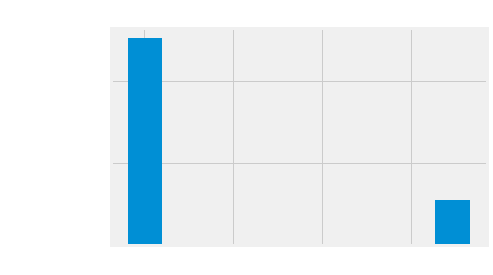

In [59]:
app_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram')
plt.title('Days Employment Histogram',fontsize = '20',color = 'white')
plt.ylabel('Frequency',fontsize = '20',color = 'white')
plt.tick_params(axis='x',labelsize=20,colors='white')
plt.tick_params(axis='y',labelsize=20,colors='white')

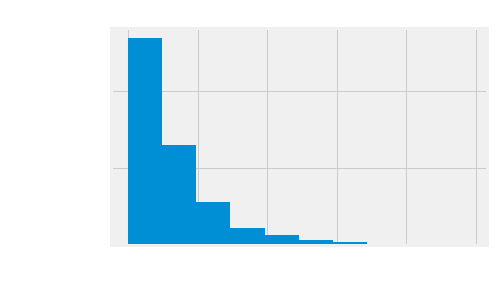

In [60]:
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)
(app_train['DAYS_EMPLOYED']/-365).plot.hist(title = 'Days Employment Histogram')
plt.title('Days Employment Histogram',fontsize = '20',color = 'white')
plt.xlabel('Days Employment',fontsize = '20',color = 'white')
plt.ylabel('Frequency',fontsize = '20',color = 'white')
plt.tick_params(axis='x',labelsize=20,colors='white')
plt.tick_params(axis='y',labelsize=20,colors='white')

In [61]:
#这一段是画图代码，无需弄懂
def plot_stats(feature,label_rotation=False,horizontal_layout=True):
    temp = app_train[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index,'Number of contracts': temp.values})

    # Calculate the percentage of target=1 per category value
    cat_perc = app_train[[feature, 'TARGET']].groupby([feature],as_index=False).mean()
    cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)
    
    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12,14))
    sns.set_color_codes("pastel")
    s = sns.barplot(ax=ax1, x = feature, y="Number of contracts",data=df1)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    
    s = sns.barplot(ax=ax2, x = feature, y='TARGET', order=cat_perc[feature], data=cat_perc)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.ylabel('Percent of target with value 1 [%]', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)

    plt.show();
    
def plot_distribution(var):
    
    i = 0
    t1 = app_train.loc[app_train['TARGET'] != 0]
    t0 = app_train.loc[app_train['TARGET'] == 0]

    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(2,2,figsize=(12,12))

    for feature in var:
        i += 1
        plt.subplot(2,2,i)
        sns.kdeplot(t1[feature], bw=0.5,label="TARGET = 1")
        sns.kdeplot(t0[feature], bw=0.5,label="TARGET = 0")
        plt.ylabel('Density plot', fontsize=12)
        plt.xlabel(feature, fontsize=12)
        locs, labels = plt.xticks()
        plt.tick_params(axis='both', which='major', labelsize=12)
    plt.show();

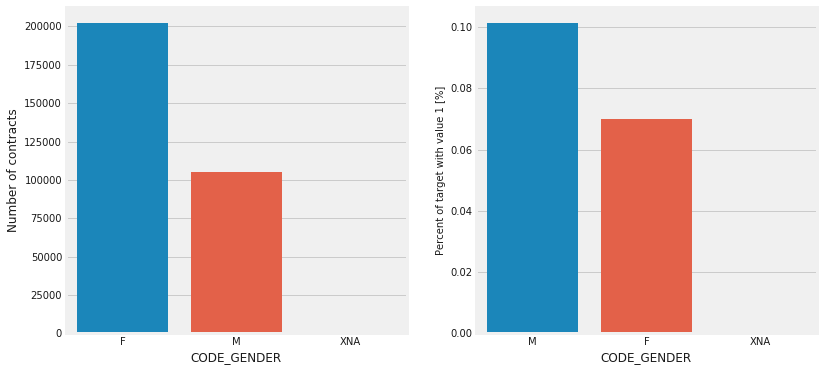

In [62]:
plot_stats('CODE_GENDER')

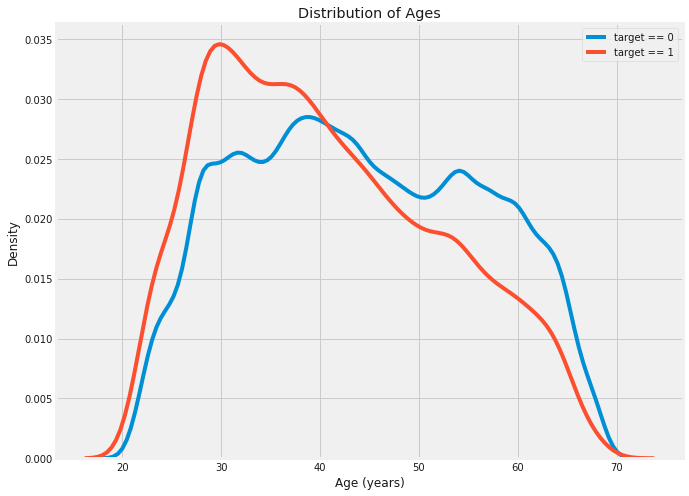

In [63]:
plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'DAYS_BIRTH'] / -365, label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, 'DAYS_BIRTH'] / -365, label = 'target == 1')

# Labeling of plot
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages');

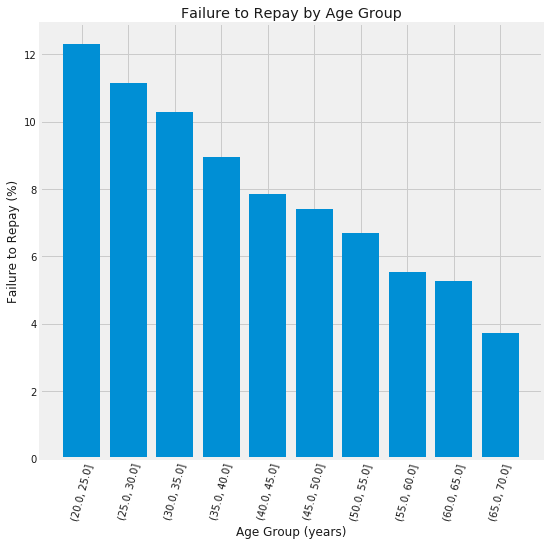

In [64]:
age_data = app_train[['TARGET', 'DAYS_BIRTH']]
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / -365

# Bin the age data
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))
age_groups  = age_data.groupby('YEARS_BINNED').mean()
plt.figure(figsize = (8, 8))

# Graph the age bins and the average of the target as a bar plot
plt.bar(age_groups.index.astype(str), 100 * age_groups['TARGET'])

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group');

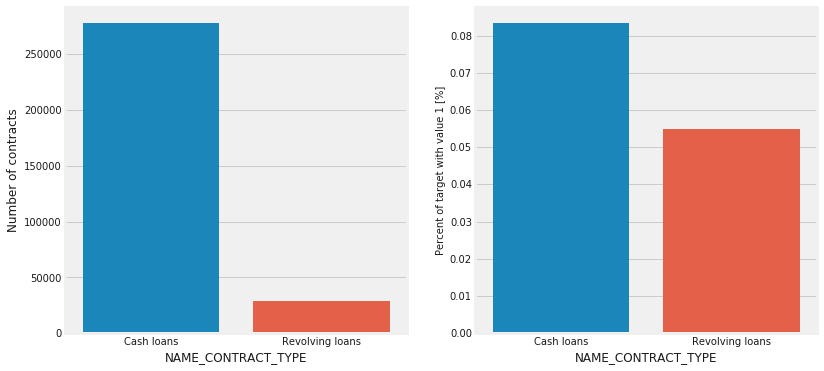

In [65]:
plot_stats('NAME_CONTRACT_TYPE')

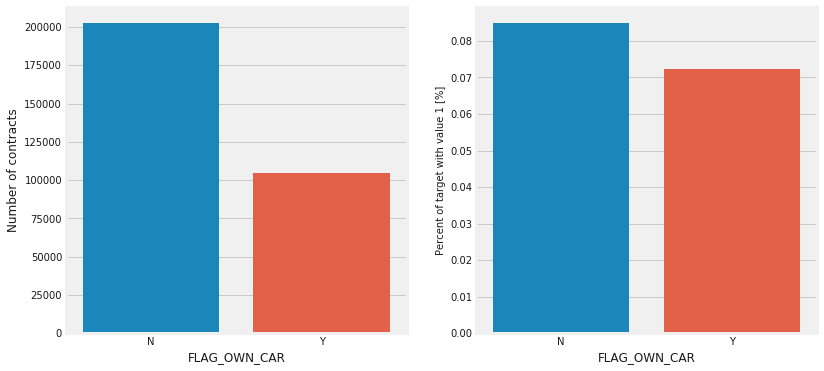

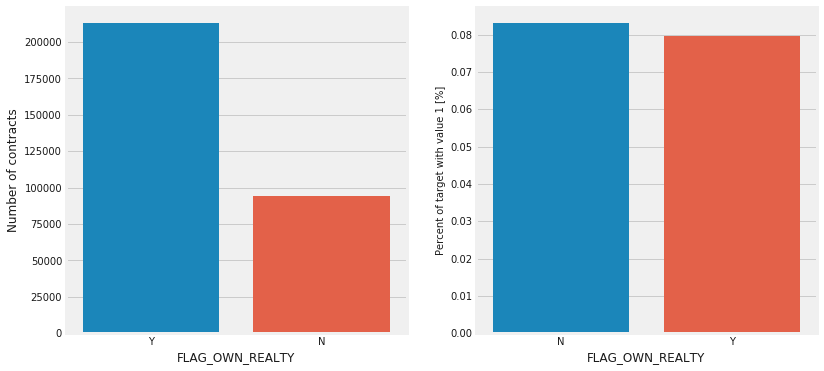

In [66]:
plot_stats('FLAG_OWN_CAR')
plot_stats('FLAG_OWN_REALTY')

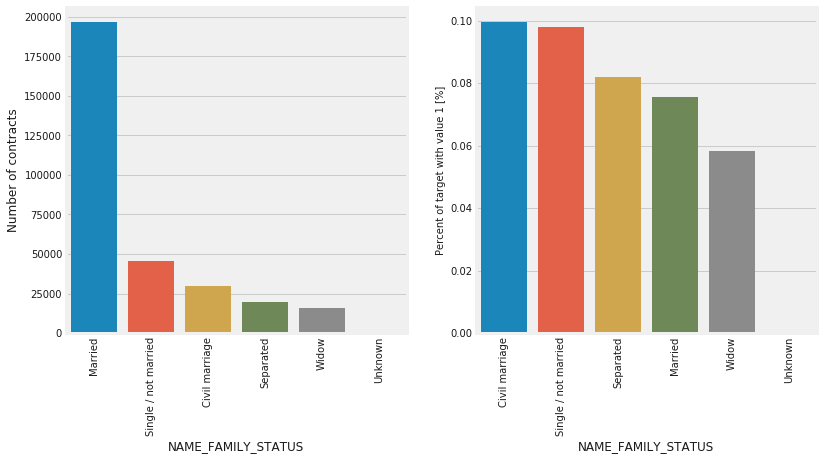

In [67]:
plot_stats('NAME_FAMILY_STATUS',True, True)

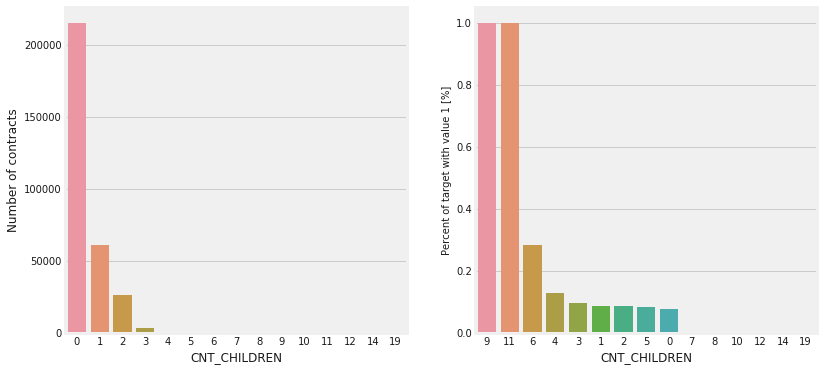

In [68]:
plot_stats('CNT_CHILDREN')

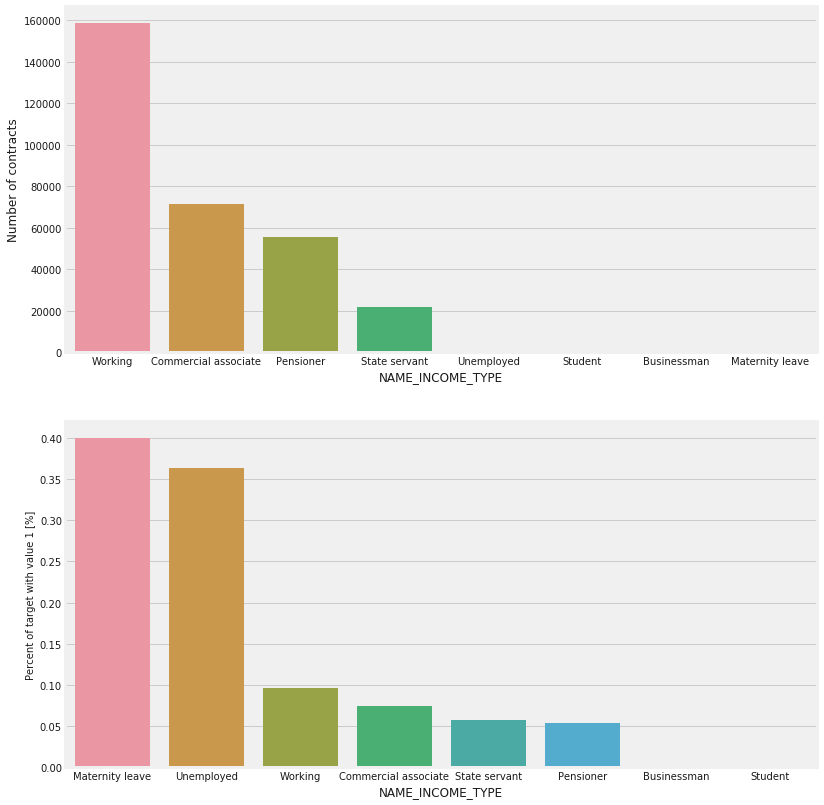

In [69]:
plot_stats('NAME_INCOME_TYPE',False,False)

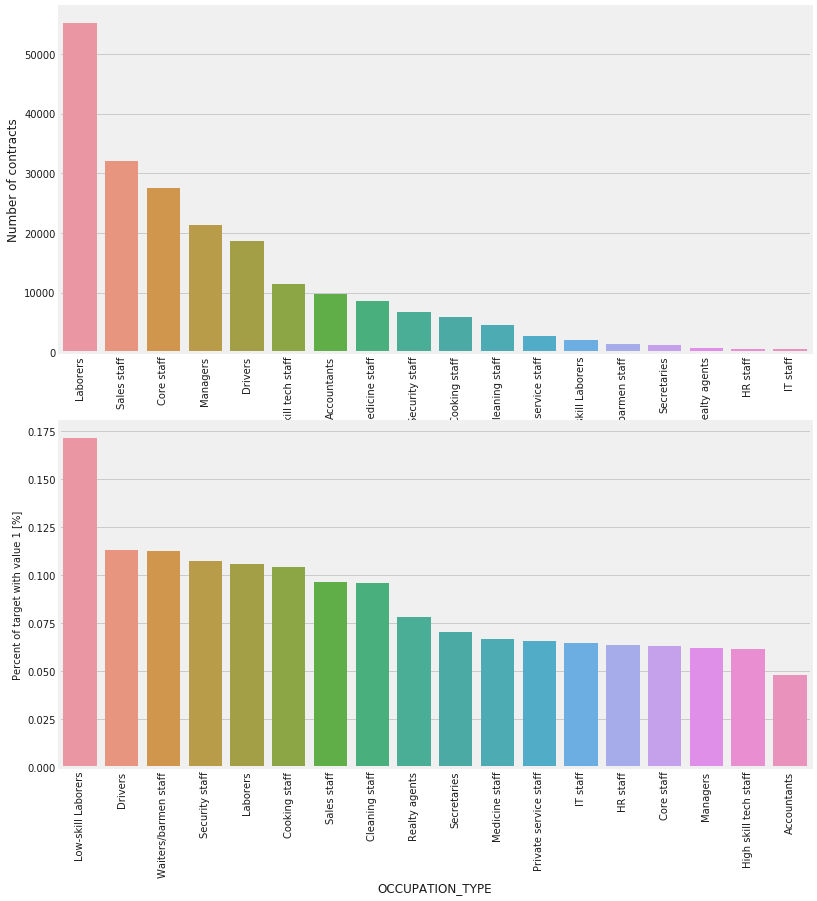

In [70]:
plot_stats('OCCUPATION_TYPE',True, False)

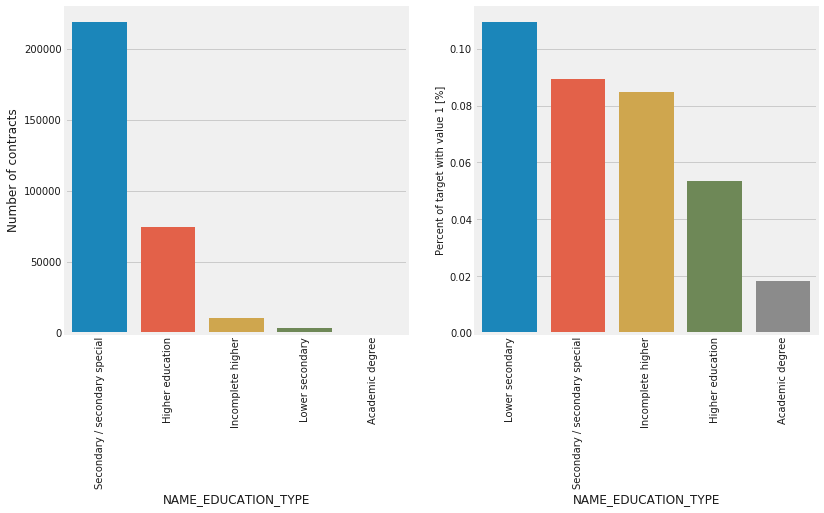

In [71]:
plot_stats('NAME_EDUCATION_TYPE',True)

In [82]:
app_train_domain = app_train.copy()
app_test_domain = app_test.copy()

In [83]:
app_train_domain['CREDIT_INCOME_PERCENT'] = app_train_domain['AMT_CREDIT'] / app_train_domain['AMT_INCOME_TOTAL']
app_train_domain['ANNUITY_INCOME_PERCENT'] = app_train_domain['AMT_ANNUITY'] / app_train_domain['AMT_INCOME_TOTAL']
app_train_domain['CREDIT_TERM'] = app_train_domain['AMT_ANNUITY'] / app_train_domain['AMT_CREDIT']
app_train_domain['DAYS_EMPLOYED_PERCENT'] = app_train_domain['DAYS_EMPLOYED'] / app_train_domain['DAYS_BIRTH']
app_train_domain['INCOME_PER_CHILD'] = app_train_domain['AMT_INCOME_TOTAL'] / app_train_domain['CNT_CHILDREN']
app_train_domain['HAS_HOUSE_INFORMATION'] = app_train_domain['COMMONAREA_MEDI'].apply(lambda x:1 if x>0 else 0)

In [84]:
app_train_domain.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

           ...            AMT_REQ_CREDIT_BUREAU_WEEK  \
0          ...                                   0.0   
1          ...                                   0.0   
2          ...                                   0.0   
3          ...                                   NaN   
4          ...                                   0.0   

  AMT_REQ_CREDIT_BUREAU_MON AMT_REQ_CREDIT_BUREAU_QRT  \
0                       0.0                       0.0   
1                       0.0                       0.0   
2                       0.0                       0.0   
3                       NaN                       NaN   
4                       0.0                       0.0   

  AMT_REQ_CREDIT_BUREAU_YEAR CREDIT_INCOME_PERCENT ANNUITY_INCOME_PERCENT  \
0                        1.0              2.007889               0.121978   
1                        0.0              4.790750               0.132217   
2                        0.0              2.000000               0.100000   
3                        NaN              2.316167               0.219900   
4                        0.0              4.222222               0.179963   

   CREDIT_TERM  DAYS_EMPLOYED_PERCENT  INCOME_PER_CHILD  HAS_HOUSE_INFORMATION  
0     0.060749               0.067329               inf                      1  
1     0.027598               0.070862               inf                      1  
2     0.050000               0.011814               inf                      0  
3     0.094941               0.159905               inf                      0  
4     0.042623               0.152418               inf                      0  

[5 rows x 128 columns]

D:\Software\Anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning:

invalid value encountered in greater

D:\Software\Anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning:

invalid value encountered in less



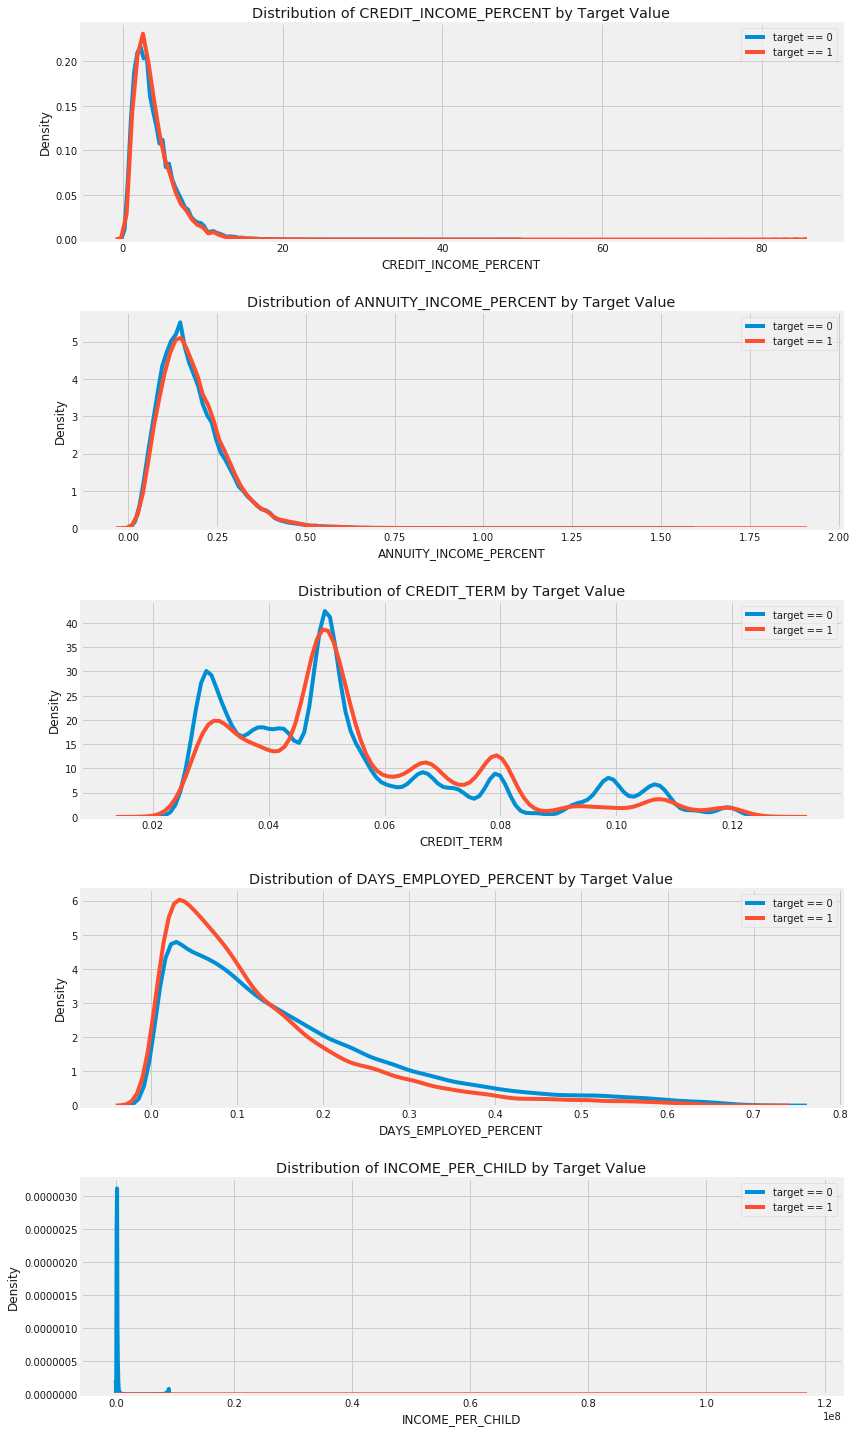

In [85]:
plt.figure(figsize = (12, 20))
# iterate through the new features
for i, feature in enumerate(['CREDIT_INCOME_PERCENT', 'ANNUITY_INCOME_PERCENT', 'CREDIT_TERM', 'DAYS_EMPLOYED_PERCENT','INCOME_PER_CHILD']):
    
    # create a new subplot for each source
    plt.subplot(5, 1, i + 1)
    # plot repaid loans
    sns.kdeplot(app_train_domain.loc[app_train_domain['TARGET'] == 0, feature], label = 'target == 0')
    # plot loans that were not repaid
    sns.kdeplot(app_train_domain.loc[app_train_domain['TARGET'] == 1, feature], label = 'target == 1')
    
    # Label the plots
    plt.title('Distribution of %s by Target Value' % feature)
    plt.xlabel('%s' % feature); plt.ylabel('Density');
    
plt.tight_layout(h_pad = 2.5)

In [86]:
def plot_stats(feature,label_rotation=False,horizontal_layout=True):
    temp = app_train_domain[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index,'Number of contracts': temp.values})

    # Calculate the percentage of target=1 per category value
    cat_perc = app_train_domain[[feature, 'TARGET']].groupby([feature],as_index=False).mean()
    cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)
    
    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12,14))
    sns.set_color_codes("pastel")
    s = sns.barplot(ax=ax1, x = feature, y="Number of contracts",data=df1)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    
    s = sns.barplot(ax=ax2, x = feature, y='TARGET', order=cat_perc[feature], data=cat_perc)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.ylabel('Percent of target with value 1 [%]', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)

    plt.show();

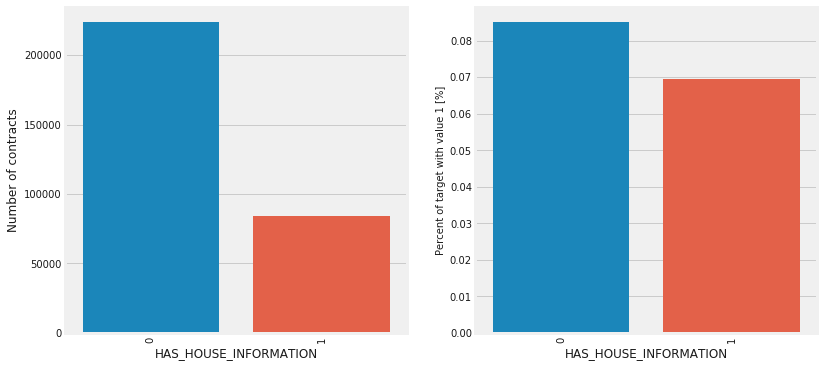

In [87]:
plot_stats('HAS_HOUSE_INFORMATION',True)

In [88]:
bureau = pd.read_csv('D:/code/Bank Loan Customer Default Risk Prediction/data/bureau.csv')
bureau.head()

SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
0      215354       5714462        Closed      currency 1         -497   
1      215354       5714463        Active      currency 1         -208   
2      215354       5714464        Active      currency 1         -203   
3      215354       5714465        Active      currency 1         -203   
4      215354       5714466        Active      currency 1         -629   

   CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
0                   0               -153.0             -153.0   
1                   0               1075.0                NaN   
2                   0                528.0                NaN   
3                   0                  NaN                NaN   
4                   0               1197.0                NaN   

   AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
0                     NaN                   0         91323.0   
1                     NaN                   0        225000.0   
2                     NaN                   0        464323.5   
3                     NaN                   0         90000.0   
4                 77674.5                   0       2700000.0   

   AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  \
0                  0.0                   NaN                     0.0   
1             171342.0                   NaN                     0.0   
2                  NaN                   NaN                     0.0   
3                  NaN                   NaN                     0.0   
4                  NaN                   NaN                     0.0   

       CREDIT_TYPE  DAYS_CREDIT_UPDATE  AMT_ANNUITY  
0  Consumer credit                -131          NaN  
1      Credit card                 -20          NaN  
2  Consumer credit                 -16          NaN  
3      Credit card                 -16          NaN  
4  Consumer credit                 -21          NaN

In [89]:
previous_loan_counts = bureau.groupby('SK_ID_CURR', as_index=False)['SK_ID_BUREAU'].count().rename(columns = {'SK_ID_BUREAU': 'previous_loan_counts'})
previous_loan_counts.head()

SK_ID_CURR  previous_loan_counts
0      100001                     7
1      100002                     8
2      100003                     4
3      100004                     2
4      100005                     3

In [90]:
app_train_domain = app_train_domain.merge(previous_loan_counts, on = 'SK_ID_CURR', how = 'left')

# Fill the missing values with 0 
app_train_domain['previous_loan_counts'] = app_train_domain['previous_loan_counts'].fillna(0)
app_train_domain.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

           ...           AMT_REQ_CREDIT_BUREAU_MON AMT_REQ_CREDIT_BUREAU_QRT  \
0          ...                                 0.0                       0.0   
1          ...                                 0.0                       0.0   
2          ...                                 0.0                       0.0   
3          ...                                 NaN                       NaN   
4          ...                                 0.0                       0.0   

  AMT_REQ_CREDIT_BUREAU_YEAR CREDIT_INCOME_PERCENT ANNUITY_INCOME_PERCENT  \
0                        1.0              2.007889               0.121978   
1                        0.0              4.790750               0.132217   
2                        0.0              2.000000               0.100000   
3                        NaN              2.316167               0.219900   
4                        0.0              4.222222               0.179963   

  CREDIT_TERM  DAYS_EMPLOYED_PERCENT  INCOME_PER_CHILD  HAS_HOUSE_INFORMATION  \
0    0.060749               0.067329               inf                      1   
1    0.027598               0.070862               inf                      1   
2    0.050000               0.011814               inf                      0   
3    0.094941               0.159905               inf                      0   
4    0.042623               0.152418               inf                      0   

   previous_loan_counts  
0                   8.0  
1                   4.0  
2                   2.0  
3                   0.0  
4                   1.0  

[5 rows x 129 columns]

In [91]:
print(app_train_domain[app_train_domain.TARGET==1]['previous_loan_counts'].describe())
print(app_train_domain[app_train_domain.TARGET==0]['previous_loan_counts'].describe())

count    24825.000000
mean         4.613092
std          4.732792
min          0.000000
25%          1.000000
50%          3.000000
75%          7.000000
max         55.000000
Name: previous_loan_counts, dtype: float64
count    282686.000000
mean          4.778464
std           4.474586
min           0.000000
25%           1.000000
50%           4.000000
75%           7.000000
max         116.000000
Name: previous_loan_counts, dtype: float64


In [92]:
def kde_target(var_name, df):
    
    # Calculate the correlation coefficient between the new variable and the target
    corr = df['TARGET'].corr(df[var_name])
    
    # Calculate medians for repaid vs not repaid
    avg_repaid = df.ix[df['TARGET'] == 0, var_name].median()
    avg_not_repaid = df.ix[df['TARGET'] == 1, var_name].median()
    
    plt.figure(figsize = (12, 6))
    
    # Plot the distribution for target == 0 and target == 1
    sns.kdeplot(df.ix[df['TARGET'] == 0, var_name], label = 'TARGET == 0')
    sns.kdeplot(df.ix[df['TARGET'] == 1, var_name], label = 'TARGET == 1')
    
    # label the plot
    plt.xlabel(var_name); plt.ylabel('Density'); plt.title('%s Distribution' % var_name)
    plt.legend();
    
    # print out the correlation
    print('The correlation between %s and the TARGET is %0.4f' % (var_name, corr))
    # Print out average values
    print('Median value for loan that was not repaid = %0.4f' % avg_not_repaid)
    print('Median value for loan that was repaid =     %0.4f' % avg_repaid)

D:\Software\Anaconda\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated

D:\Software\Anaconda\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated

D:\Software\Anaconda\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated



The correlation between previous_loan_counts and the TARGET is -0.0100
Median value for loan that was not repaid = 3.0000
Median value for loan that was repaid =     4.0000


D:\Software\Anaconda\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated



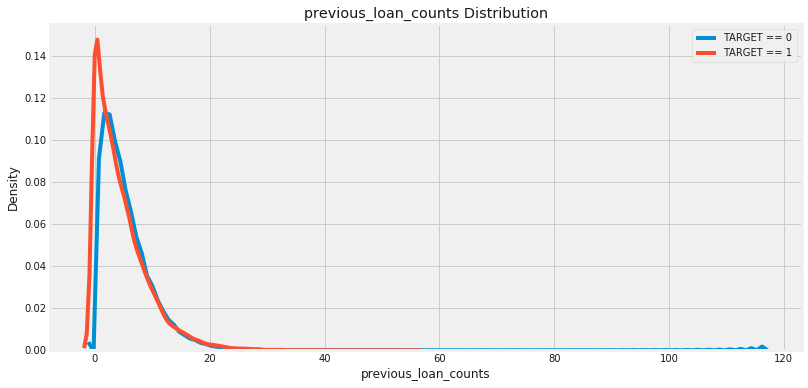

In [93]:
kde_target('previous_loan_counts', app_train_domain)

In [94]:
bureau_agg = bureau.drop(columns = ['SK_ID_BUREAU']).groupby('SK_ID_CURR', as_index = False).agg(['count', 'mean', 'max', 'min', 'sum']).reset_index()
bureau_agg.head()

SK_ID_CURR DAYS_CREDIT                               CREDIT_DAY_OVERDUE  \
                   count         mean  max   min   sum              count   
0     100001           7  -735.000000  -49 -1572 -5145                  7   
1     100002           8  -874.000000 -103 -1437 -6992                  8   
2     100003           4 -1400.750000 -606 -2586 -5603                  4   
3     100004           2  -867.000000 -408 -1326 -1734                  2   
4     100005           3  -190.666667  -62  -373  -572                  3   

                 ...    DAYS_CREDIT_UPDATE                               \
  mean max min   ...                 count        mean  max   min   sum   
0  0.0   0   0   ...                     7  -93.142857   -6  -155  -652   
1  0.0   0   0   ...                     8 -499.875000   -7 -1185 -3999   
2  0.0   0   0   ...                     4 -816.000000  -43 -2131 -3264   
3  0.0   0   0   ...                     2 -532.000000 -382  -682 -1064   
4  0.0   0   0   ...                     3  -54.333333  -11  -121  -163   

  AMT_ANNUITY                                      
        count         mean      max  min      sum  
0           7  3545.357143  10822.5  0.0  24817.5  
1           7     0.000000      0.0  0.0      0.0  
2           0          NaN      NaN  NaN      0.0  
3           0          NaN      NaN  NaN      0.0  
4           3  1420.500000   4261.5  0.0   4261.5  

[5 rows x 61 columns]

In [95]:
columns = ['SK_ID_CURR']

# Iterate through the variables names
for var in bureau_agg.columns.levels[0]:
    # Skip the id name
    if var != 'SK_ID_CURR':
        
        # Iterate through the stat names
        for stat in bureau_agg.columns.levels[1][:-1]:
            # Make a new column name for the variable and stat
            columns.append('bureau_%s_%s' % (var, stat))

In [96]:
bureau_agg.columns = columns
bureau_agg.head()

SK_ID_CURR  bureau_DAYS_CREDIT_count  bureau_DAYS_CREDIT_mean  \
0      100001                         7              -735.000000   
1      100002                         8              -874.000000   
2      100003                         4             -1400.750000   
3      100004                         2              -867.000000   
4      100005                         3              -190.666667   

   bureau_DAYS_CREDIT_max  bureau_DAYS_CREDIT_min  bureau_DAYS_CREDIT_sum  \
0                     -49                   -1572                   -5145   
1                    -103                   -1437                   -6992   
2                    -606                   -2586                   -5603   
3                    -408                   -1326                   -1734   
4                     -62                    -373                    -572   

   bureau_CREDIT_DAY_OVERDUE_count  bureau_CREDIT_DAY_OVERDUE_mean  \
0                                7                             0.0   
1                                8                             0.0   
2                                4                             0.0   
3                                2                             0.0   
4                                3                             0.0   

   bureau_CREDIT_DAY_OVERDUE_max  bureau_CREDIT_DAY_OVERDUE_min  \
0                              0                              0   
1                              0                              0   
2                              0                              0   
3                              0                              0   
4                              0                              0   

            ...            bureau_DAYS_CREDIT_UPDATE_count  \
0           ...                                          7   
1           ...                                          8   
2           ...                                          4   
3           ...                                          2   
4           ...                                          3   

   bureau_DAYS_CREDIT_UPDATE_mean  bureau_DAYS_CREDIT_UPDATE_max  \
0                      -93.142857                             -6   
1                     -499.875000                             -7   
2                     -816.000000                            -43   
3                     -532.000000                           -382   
4                      -54.333333                            -11   

   bureau_DAYS_CREDIT_UPDATE_min  bureau_DAYS_CREDIT_UPDATE_sum  \
0                           -155                           -652   
1                          -1185                          -3999   
2                          -2131                          -3264   
3                           -682                          -1064   
4                           -121                           -163   

   bureau_AMT_ANNUITY_count  bureau_AMT_ANNUITY_mean  bureau_AMT_ANNUITY_max  \
0                         7              3545.357143                 10822.5   
1                         7                 0.000000                     0.0   
2                         0                      NaN                     NaN   
3                         0                      NaN                     NaN   
4                         3              1420.500000                  4261.5   

   bureau_AMT_ANNUITY_min  bureau_AMT_ANNUITY_sum  
0                     0.0                 24817.5  
1                     0.0                     0.0  
2                     NaN                     0.0  
3                     NaN                     0.0  
4                     0.0                  4261.5  

[5 rows x 61 columns]

In [97]:
app_train_domain = app_train.merge(bureau_agg, on = 'SK_ID_CURR', how = 'left')
app_train_domain.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

            ...            bureau_DAYS_CREDIT_UPDATE_count  \
0           ...                                        8.0   
1           ...                                        4.0   
2           ...                                        2.0   
3           ...                                        NaN   
4           ...                                        1.0   

  bureau_DAYS_CREDIT_UPDATE_mean bureau_DAYS_CREDIT_UPDATE_max  \
0                       -499.875                          -7.0   
1                       -816.000                         -43.0   
2                       -532.000                        -382.0   
3                            NaN                           NaN   
4                       -783.000                        -783.0   

  bureau_DAYS_CREDIT_UPDATE_min bureau_DAYS_CREDIT_UPDATE_sum  \
0                       -1185.0                       -3999.0   
1                       -2131.0                       -3264.0   
2                        -682.0                       -1064.0   
3                           NaN                           NaN   
4                        -783.0                        -783.0   

  bureau_AMT_ANNUITY_count  bureau_AMT_ANNUITY_mean  bureau_AMT_ANNUITY_max  \
0                      7.0                      0.0                     0.0   
1                      0.0                      NaN                     NaN   
2                      0.0                      NaN                     NaN   
3                      NaN                      NaN                     NaN   
4                      0.0                      NaN                     NaN   

   bureau_AMT_ANNUITY_min  bureau_AMT_ANNUITY_sum  
0                     0.0                     0.0  
1                     NaN                     0.0  
2                     NaN                     0.0  
3                     NaN                     NaN  
4                     NaN                     0.0  

[5 rows x 182 columns]

In [99]:
# List of new correlations
new_corrs = []

# Iterate through the columns 
for col in columns:
    # Calculate correlation with the target
    corr = app_train_domain['TARGET'].corr(app_train_domain[col])
    
    # Append the list as a tuple

    new_corrs.append((col, corr))

In [100]:
new_corrs = sorted(new_corrs, key = lambda x: abs(x[1]), reverse = True)
new_corrs[:15]

[('bureau_DAYS_CREDIT_mean', 0.08972896721998122),
 ('bureau_DAYS_CREDIT_min', 0.0752482510301036),
 ('bureau_DAYS_CREDIT_UPDATE_mean', 0.06892735266968668),
 ('bureau_DAYS_ENDDATE_FACT_min', 0.05588737984392113),
 ('bureau_DAYS_CREDIT_ENDDATE_sum', 0.05373489560102051),
 ('bureau_DAYS_ENDDATE_FACT_mean', 0.05319962585758661),
 ('bureau_DAYS_CREDIT_max', 0.049782054639973095),
 ('bureau_DAYS_ENDDATE_FACT_sum', 0.04885350261111589),
 ('bureau_DAYS_CREDIT_ENDDATE_mean', 0.04698275433483543),
 ('bureau_DAYS_CREDIT_UPDATE_min', 0.042863922470730176),
 ('bureau_DAYS_CREDIT_sum', 0.04199982481484684),
 ('bureau_DAYS_CREDIT_UPDATE_sum', 0.04140363535306004),
 ('bureau_DAYS_CREDIT_ENDDATE_max', 0.036589634696329046),
 ('bureau_DAYS_CREDIT_ENDDATE_min', 0.03428110992161599),
 ('bureau_DAYS_ENDDATE_FACT_count', -0.030492306653325547)]

D:\Software\Anaconda\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated

D:\Software\Anaconda\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated

D:\Software\Anaconda\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated

D:\Software\Anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning:

invalid value encountered in 

The correlation between bureau_DAYS_CREDIT_mean and the TARGET is 0.0897
Median value for loan that was not repaid = -835.3333
Median value for loan that was repaid =     -1067.0000


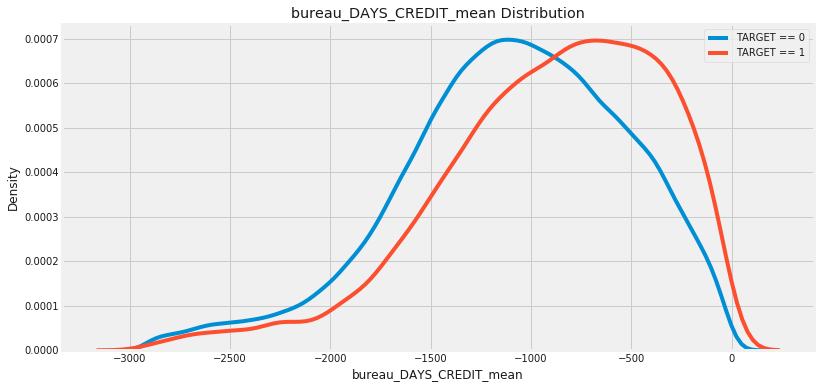

In [102]:
kde_target('bureau_DAYS_CREDIT_mean', app_train_domain)
#有一定区分度

In [103]:
def agg_numeric(df, group_var, df_name):
    # Remove id variables other than grouping variable
    for col in df:
        if col != group_var and 'SK_ID' in col:
            df = df.drop(columns = col)
            
    group_ids = df[group_var]
    numeric_df = df.select_dtypes('number')
    numeric_df[group_var] = group_ids

    # Group by the specified variable and calculate the statistics
    agg = numeric_df.groupby(group_var).agg(['count', 'mean', 'max', 'min', 'sum']).reset_index()

    # Need to create new column names
    columns = [group_var]

    # Iterate through the variables names
    for var in agg.columns.levels[0]:
        # Skip the grouping variable
        if var != group_var:
            # Iterate through the stat names
            for stat in agg.columns.levels[1][:-1]:
                # Make a new column name for the variable and stat
                columns.append('%s_%s_%s' % (df_name, var, stat))

    agg.columns = columns
    return agg

In [104]:
#看下效果，一个函数完成了上面所有的步骤
bureau_agg_new = agg_numeric(bureau.drop(columns = ['SK_ID_BUREAU']), group_var = 'SK_ID_CURR', df_name = 'bureau')
bureau_agg_new.head()

SK_ID_CURR  bureau_DAYS_CREDIT_count  bureau_DAYS_CREDIT_mean  \
0      100001                         7              -735.000000   
1      100002                         8              -874.000000   
2      100003                         4             -1400.750000   
3      100004                         2              -867.000000   
4      100005                         3              -190.666667   

   bureau_DAYS_CREDIT_max  bureau_DAYS_CREDIT_min  bureau_DAYS_CREDIT_sum  \
0                     -49                   -1572                   -5145   
1                    -103                   -1437                   -6992   
2                    -606                   -2586                   -5603   
3                    -408                   -1326                   -1734   
4                     -62                    -373                    -572   

   bureau_CREDIT_DAY_OVERDUE_count  bureau_CREDIT_DAY_OVERDUE_mean  \
0                                7                             0.0   
1                                8                             0.0   
2                                4                             0.0   
3                                2                             0.0   
4                                3                             0.0   

   bureau_CREDIT_DAY_OVERDUE_max  bureau_CREDIT_DAY_OVERDUE_min  \
0                              0                              0   
1                              0                              0   
2                              0                              0   
3                              0                              0   
4                              0                              0   

            ...            bureau_DAYS_CREDIT_UPDATE_count  \
0           ...                                          7   
1           ...                                          8   
2           ...                                          4   
3           ...                                          2   
4           ...                                          3   

   bureau_DAYS_CREDIT_UPDATE_mean  bureau_DAYS_CREDIT_UPDATE_max  \
0                      -93.142857                             -6   
1                     -499.875000                             -7   
2                     -816.000000                            -43   
3                     -532.000000                           -382   
4                      -54.333333                            -11   

   bureau_DAYS_CREDIT_UPDATE_min  bureau_DAYS_CREDIT_UPDATE_sum  \
0                           -155                           -652   
1                          -1185                          -3999   
2                          -2131                          -3264   
3                           -682                          -1064   
4                           -121                           -163   

   bureau_AMT_ANNUITY_count  bureau_AMT_ANNUITY_mean  bureau_AMT_ANNUITY_max  \
0                         7              3545.357143                 10822.5   
1                         7                 0.000000                     0.0   
2                         0                      NaN                     NaN   
3                         0                      NaN                     NaN   
4                         3              1420.500000                  4261.5   

   bureau_AMT_ANNUITY_min  bureau_AMT_ANNUITY_sum  
0                     0.0                 24817.5  
1                     0.0                     0.0  
2                     NaN                     0.0  
3                     NaN                     0.0  
4                     0.0                  4261.5  

[5 rows x 61 columns]

In [105]:
#同样再定义一个相关性计算函数
def target_corrs(df):

    # List of correlations
    corrs = []

    # Iterate through the columns 
    for col in df.columns:
        print(col)
        # Skip the target column
        if col != 'TARGET':
            # Calculate correlation with the target
            corr = df['TARGET'].corr(df[col])

            # Append the list as a tuple
            corrs.append((col, corr))
            
    # Sort by absolute magnitude of correlations
    corrs = sorted(corrs, key = lambda x: abs(x[1]), reverse = True)
    
    return corrs

In [106]:
categorical = pd.get_dummies(bureau.select_dtypes('object'))
categorical['SK_ID_CURR'] = bureau['SK_ID_CURR']
categorical.head()

CREDIT_ACTIVE_Active  CREDIT_ACTIVE_Bad debt  CREDIT_ACTIVE_Closed  \
0                     0                       0                     1   
1                     1                       0                     0   
2                     1                       0                     0   
3                     1                       0                     0   
4                     1                       0                     0   

   CREDIT_ACTIVE_Sold  CREDIT_CURRENCY_currency 1  CREDIT_CURRENCY_currency 2  \
0                   0                           1                           0   
1                   0                           1                           0   
2                   0                           1                           0   
3                   0                           1                           0   
4                   0                           1                           0   

   CREDIT_CURRENCY_currency 3  CREDIT_CURRENCY_currency 4  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   CREDIT_TYPE_Another type of loan  CREDIT_TYPE_Car loan     ...      \
0                                 0                     0     ...       
1                                 0                     0     ...       
2                                 0                     0     ...       
3                                 0                     0     ...       
4                                 0                     0     ...       

   CREDIT_TYPE_Loan for business development  \
0                                          0   
1                                          0   
2                                          0   
3                                          0   
4                                          0   

   CREDIT_TYPE_Loan for purchase of shares (margin lending)  \
0                                                  0          
1                                                  0          
2                                                  0          
3                                                  0          
4                                                  0          

   CREDIT_TYPE_Loan for the purchase of equipment  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   CREDIT_TYPE_Loan for working capital replenishment  CREDIT_TYPE_Microloan  \
0                                                  0                       0   
1                                                  0                       0   
2                                                  0                       0   
3                                                  0                       0   
4                                                  0                       0   

   CREDIT_TYPE_Mobile operator loan  CREDIT_TYPE_Mortgage  \
0                                 0                     0   
1                                 0                     0   
2                                 0                     0   
3                                 0                     0   
4                                 0                     0   

   CREDIT_TYPE_Real estate loan  CREDIT_TYPE_Unknown type of loan  SK_ID_CURR  
0                             0                                 0      215354  
1                             0                                 0      215354  
2                             0                                 0      215354  
3                             0                                 0      215354  
4                             0     

In [107]:
categorical_grouped = categorical.groupby('SK_ID_CURR').agg(['sum', 'mean'])
categorical_grouped.head()

CREDIT_ACTIVE_Active           CREDIT_ACTIVE_Bad debt       \
                            sum      mean                    sum mean   
SK_ID_CURR                                                              
100001                        3  0.428571                      0  0.0   
100002                        2  0.250000                      0  0.0   
100003                        1  0.250000                      0  0.0   
100004                        0  0.000000                      0  0.0   
100005                        2  0.666667                      0  0.0   

           CREDIT_ACTIVE_Closed           CREDIT_ACTIVE_Sold       \
                            sum      mean                sum mean   
SK_ID_CURR                                                          
100001                        4  0.571429                  0  0.0   
100002                        6  0.750000                  0  0.0   
100003                        3  0.750000                  0  0.0   
100004                        2  1.000000                  0  0.0   
100005                        1  0.333333                  0  0.0   

           CREDIT_CURRENCY_currency 1      ...  CREDIT_TYPE_Microloan       \
                                  sum mean ...                    sum mean   
SK_ID_CURR                                 ...                               
100001                              7  1.0 ...                      0  0.0   
100002                              8  1.0 ...                      0  0.0   
100003                              4  1.0 ...                      0  0.0   
100004                              2  1.0 ...                      0  0.0   
100005                              3  1.0 ...                      0  0.0   

           CREDIT_TYPE_Mobile operator loan      CREDIT_TYPE_Mortgage       \
                                        sum mean                  sum mean   
SK_ID_CURR                                                                   
100001                                    0  0.0                    0  0.0   
100002                                    0  0.0                    0  0.0   
100003                                    0  0.0                    0  0.0   
100004                                    0  0.0                    0  0.0   
100005                                    0  0.0                    0  0.0   

           CREDIT_TYPE_Real estate loan      CREDIT_TYPE_Unknown type of loan  \
                                    sum mean                              sum   
SK_ID_CURR                                                                      
100001                                0  0.0                                0   
100002                                0  0.0                                0   
100003                                0  0.0                                0   
100004                                0  0.0                                0   
100005                                0  0.0                                0   

                 
           mean  
SK_ID_CURR       
100001      0.0  
100002      0.0  
100003      0.0  
100004      0.0  
100005      0.0  

[5 rows x 46 columns]

In [108]:
group_var = 'SK_ID_CURR'

# Need to create new column names
columns = []

# Iterate through the variables names
for var in categorical_grouped.columns.levels[0]:
    # Skip the grouping variable
    if var != group_var:
        # Iterate through the stat names
        for stat in ['count', 'count_norm']:
            # Make a new column name for the variable and stat
            columns.append('%s_%s' % (var, stat))

#  Rename the columns
categorical_grouped.columns = columns

categorical_grouped.head()

CREDIT_ACTIVE_Active_count  CREDIT_ACTIVE_Active_count_norm  \
SK_ID_CURR                                                                
100001                               3                         0.428571   
100002                               2                         0.250000   
100003                               1                         0.250000   
100004                               0                         0.000000   
100005                               2                         0.666667   

            CREDIT_ACTIVE_Bad debt_count  CREDIT_ACTIVE_Bad debt_count_norm  \
SK_ID_CURR                                                                    
100001                                 0                                0.0   
100002                                 0                                0.0   
100003                                 0                                0.0   
100004                                 0                                0.0   
100005                                 0                                0.0   

            CREDIT_ACTIVE_Closed_count  CREDIT_ACTIVE_Closed_count_norm  \
SK_ID_CURR                                                                
100001                               4                         0.571429   
100002                               6                         0.750000   
100003                               3                         0.750000   
100004                               2                         1.000000   
100005                               1                         0.333333   

            CREDIT_ACTIVE_Sold_count  CREDIT_ACTIVE_Sold_count_norm  \
SK_ID_CURR                                                            
100001                             0                            0.0   
100002                             0                            0.0   
100003                             0                            0.0   
100004                             0                            0.0   
100005                             0                            0.0   

            CREDIT_CURRENCY_currency 1_count  \
SK_ID_CURR                                     
100001                                     7   
100002                                     8   
100003                                     4   
100004                                     2   
100005                                     3   

            CREDIT_CURRENCY_currency 1_count_norm  \
SK_ID_CURR                                          
100001                                        1.0   
100002                                        1.0   
100003                                        1.0   
100004                                        1.0   
100005                                        1.0   

                               ...                       \
SK_ID_CURR                     ...                        
100001                         ...                        
100002                         ...                        
100003                         ...                        
100004                         ...                        
100005                         ...                        

            CREDIT_TYPE_Microloan_count  CREDIT_TYPE_Microloan_count_norm  \
SK_ID_CURR                                                                  
100001                                0                               0.0   
100002                                0                               0.0   
100003                                0                               0.0   
100004                                0                               0.0   
100005                                0                               0.0   

            CREDIT_TYPE_Mobile operator loan_count  \
SK_ID_CURR                                           
100001                                           0   
100002                                           0   
100003                       

In [109]:
#做好的特征可以合并到主训练集中
app_train_domain = app_train_domain.merge(categorical_grouped, left_on = 'SK_ID_CURR', right_index = True, how = 'left')
app_train_domain.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

                      ...                       CREDIT_TYPE_Microloan_count  \
0                     ...                                               0.0   
1                     ...                                               0.0   
2                     ...                                               0.0   
3                     ...                                               NaN   
4                     ...                                               0.0   

  CREDIT_TYPE_Microloan_count_norm CREDIT_TYPE_Mobile operator loan_count  \
0                              0.0                                    0.0   
1                              0.0                                    0.0   
2                              0.0                                    0.0   
3                              NaN                                    NaN   
4                              0.0                                    0.0   

  CREDIT_TYPE_Mobile operator loan_count_norm CREDIT_TYPE_Mortgage_count  \
0                                         0.0                        0.0   
1                                         0.0                        0.0   
2                                         0.0                        0.0   
3                                         NaN                        NaN   
4                                         0.0                        0.0   

  CREDIT_TYPE_Mortgage_count_norm  CREDIT_TYPE_Real estate loan_count  \
0                             0.0                                 0.0   
1                             0.0                                 0.0   
2                             0.0                                 0.0   
3                             NaN                                 NaN   
4                             0.0                                 0.0   

   CREDIT_TYPE_Real estate loan_count_norm  \
0                                      0.0   
1                                      0.0   
2                                      0.0   
3                                      NaN   
4                                      0.0   

   CREDIT_TYPE_Unknown type of loan_count  \
0                                     0.0   
1                                     0.0   
2                                     0.0   
3                                     NaN   
4                                     0.0   

   CREDIT_TYPE_Unknown type of loan_count_norm  
0                                          0.0  
1                                          0.0  
2                                          0.0  
3                                          NaN  
4                                          0.0  

[5 rows x 228 columns]

In [110]:
def count_categorical(df, group_var, df_name):
 
    # Select the categorical columns
    categorical = pd.get_dummies(df.select_dtypes('object'))

    # Make sure to put the identifying id on the column
    categorical[group_var] = df[group_var]

    # Groupby the group var and calculate the sum and mean
    categorical = categorical.groupby(group_var).agg(['sum', 'mean'])
    
    column_names = []
    
    # Iterate through the columns in level 0
    for var in categorical.columns.levels[0]:
        # Iterate through the stats in level 1
        for stat in ['count', 'count_norm']:
            # Make a new column name
            column_names.append('%s_%s_%s' % (df_name, var, stat))
    
    categorical.columns = column_names
    
    return categorical

In [111]:
#来看一下效果，一个函数完成了上面的所有步骤
bureau_counts = count_categorical(bureau, group_var = 'SK_ID_CURR', df_name = 'bureau')
bureau_counts.head()

bureau_CREDIT_ACTIVE_Active_count  \
SK_ID_CURR                                      
100001                                      3   
100002                                      2   
100003                                      1   
100004                                      0   
100005                                      2   

            bureau_CREDIT_ACTIVE_Active_count_norm  \
SK_ID_CURR                                           
100001                                    0.428571   
100002                                    0.250000   
100003                                    0.250000   
100004                                    0.000000   
100005                                    0.666667   

            bureau_CREDIT_ACTIVE_Bad debt_count  \
SK_ID_CURR                                        
100001                                        0   
100002                                        0   
100003                                        0   
100004                                        0   
100005                                        0   

            bureau_CREDIT_ACTIVE_Bad debt_count_norm  \
SK_ID_CURR                                             
100001                                           0.0   
100002                                           0.0   
100003                                           0.0   
100004                                           0.0   
100005                                           0.0   

            bureau_CREDIT_ACTIVE_Closed_count  \
SK_ID_CURR                                      
100001                                      4   
100002                                      6   
100003                                      3   
100004                                      2   
100005                                      1   

            bureau_CREDIT_ACTIVE_Closed_count_norm  \
SK_ID_CURR                                           
100001                                    0.571429   
100002                                    0.750000   
100003                                    0.750000   
100004                                    1.000000   
100005                                    0.333333   

            bureau_CREDIT_ACTIVE_Sold_count  \
SK_ID_CURR                                    
100001                                    0   
100002                                    0   
100003                                    0   
100004                                    0   
100005                                    0   

            bureau_CREDIT_ACTIVE_Sold_count_norm  \
SK_ID_CURR                                         
100001                                       0.0   
100002                                       0.0   
100003                                       0.0   
100004                                       0.0   
100005                                       0.0   

            bureau_CREDIT_CURRENCY_currency 1_count  \
SK_ID_CURR                                            
100001                                            7   
100002                                            8   
100003                                            4   
100004                                            2   
100005                                            3   

            bureau_CREDIT_CURRENCY_currency 1_count_norm  \
SK_ID_CURR                                                 
100001                                               1.0   
100002                                               1.0   
100003                                               1.0   
100004                                               1.0   
100005                                               1.0   

                                   ...                          \
SK_ID_CURR                         ...                           
100001                             ...                           
100002                             ...                           
100003                             ...           

In [121]:
app_train = pd.read_csv('D:/code/Bank Loan Customer Default Risk Prediction/data/application_train.csv')
app_test = pd.read_csv('D:/code/Bank Loan Customer Default Risk Prediction/data/application_test.csv')
bureau = pd.read_csv('D:/code/Bank Loan Customer Default Risk Prediction/data/bureau.csv')
previous_application = pd.read_csv('D:/code/Bank Loan Customer Default Risk Prediction/data/previous_application.csv')

In [122]:
app_train['CREDIT_INCOME_PERCENT'] = app_train['AMT_CREDIT'] / app_train['AMT_INCOME_TOTAL']
app_train['ANNUITY_INCOME_PERCENT'] = app_train['AMT_ANNUITY'] / app_train['AMT_INCOME_TOTAL']
app_train['CREDIT_TERM'] = app_train['AMT_ANNUITY'] / app_train['AMT_CREDIT']
app_train['DAYS_EMPLOYED_PERCENT'] = app_train['DAYS_EMPLOYED'] / app_train['DAYS_BIRTH']
app_train['INCOME_PER_CHILD'] = app_train['AMT_INCOME_TOTAL'] / app_train['CNT_CHILDREN']
app_train['HAS_HOUSE_INFORMATION'] = app_train['COMMONAREA_MEDI'].apply(lambda x:1 if x>0 else 0)


app_test['CREDIT_INCOME_PERCENT'] = app_test['AMT_CREDIT'] / app_test['AMT_INCOME_TOTAL']
app_test['ANNUITY_INCOME_PERCENT'] = app_test['AMT_ANNUITY'] / app_test['AMT_INCOME_TOTAL']
app_test['CREDIT_TERM'] = app_test['AMT_ANNUITY'] / app_test['AMT_CREDIT']
app_test['DAYS_EMPLOYED_PERCENT'] = app_test['DAYS_EMPLOYED'] / app_test['DAYS_BIRTH']
app_test['INCOME_PER_CHILD'] = app_test['AMT_INCOME_TOTAL'] / app_test['CNT_CHILDREN']
app_test['HAS_HOUSE_INFORMATION'] = app_test['COMMONAREA_MEDI'].apply(lambda x:1 if x>0 else 0)

In [123]:
bureau_counts = count_categorical(bureau, group_var = 'SK_ID_CURR', df_name = 'bureau')
bureau_agg_new = agg_numeric(bureau.drop(columns = ['SK_ID_BUREAU']), group_var = 'SK_ID_CURR', df_name = 'bureau')
bureau_agg_new.head()

SK_ID_CURR  bureau_DAYS_CREDIT_count  bureau_DAYS_CREDIT_mean  \
0      100001                         7              -735.000000   
1      100002                         8              -874.000000   
2      100003                         4             -1400.750000   
3      100004                         2              -867.000000   
4      100005                         3              -190.666667   

   bureau_DAYS_CREDIT_max  bureau_DAYS_CREDIT_min  bureau_DAYS_CREDIT_sum  \
0                     -49                   -1572                   -5145   
1                    -103                   -1437                   -6992   
2                    -606                   -2586                   -5603   
3                    -408                   -1326                   -1734   
4                     -62                    -373                    -572   

   bureau_CREDIT_DAY_OVERDUE_count  bureau_CREDIT_DAY_OVERDUE_mean  \
0                                7                             0.0   
1                                8                             0.0   
2                                4                             0.0   
3                                2                             0.0   
4                                3                             0.0   

   bureau_CREDIT_DAY_OVERDUE_max  bureau_CREDIT_DAY_OVERDUE_min  \
0                              0                              0   
1                              0                              0   
2                              0                              0   
3                              0                              0   
4                              0                              0   

            ...            bureau_DAYS_CREDIT_UPDATE_count  \
0           ...                                          7   
1           ...                                          8   
2           ...                                          4   
3           ...                                          2   
4           ...                                          3   

   bureau_DAYS_CREDIT_UPDATE_mean  bureau_DAYS_CREDIT_UPDATE_max  \
0                      -93.142857                             -6   
1                     -499.875000                             -7   
2                     -816.000000                            -43   
3                     -532.000000                           -382   
4                      -54.333333                            -11   

   bureau_DAYS_CREDIT_UPDATE_min  bureau_DAYS_CREDIT_UPDATE_sum  \
0                           -155                           -652   
1                          -1185                          -3999   
2                          -2131                          -3264   
3                           -682                          -1064   
4                           -121                           -163   

   bureau_AMT_ANNUITY_count  bureau_AMT_ANNUITY_mean  bureau_AMT_ANNUITY_max  \
0                         7              3545.357143                 10822.5   
1                         7                 0.000000                     0.0   
2                         0                      NaN                     NaN   
3                         0                      NaN                     NaN   
4                         3              1420.500000                  4261.5   

   bureau_AMT_ANNUITY_min  bureau_AMT_ANNUITY_sum  
0                     0.0                 24817.5  
1                     0.0                     0.0  
2                     NaN                     0.0  
3                     NaN                     0.0  
4                     0.0                  4261.5  

[5 rows x 61 columns]

In [124]:
app_train = app_train.merge(bureau_counts, on = 'SK_ID_CURR', how = 'left')
app_train = app_train.merge(bureau_agg_new, on = 'SK_ID_CURR', how = 'left')

app_test = app_test.merge(bureau_counts, on = 'SK_ID_CURR', how = 'left')
app_test = app_test.merge(bureau_agg_new, on = 'SK_ID_CURR', how = 'left')

In [125]:
previous_appication_counts = count_categorical(previous_application, group_var = 'SK_ID_CURR', df_name = 'previous_application')
previous_appication_agg_new = agg_numeric(previous_application, group_var = 'SK_ID_CURR', df_name = 'previous_application')
previous_appication_agg_new.head()

SK_ID_CURR  previous_application_AMT_ANNUITY_count  \
0      100001                                       1   
1      100002                                       1   
2      100003                                       3   
3      100004                                       1   
4      100005                                       1   

   previous_application_AMT_ANNUITY_mean  \
0                               3951.000   
1                               9251.775   
2                              56553.990   
3                               5357.250   
4                               4813.200   

   previous_application_AMT_ANNUITY_max  previous_application_AMT_ANNUITY_min  \
0                              3951.000                              3951.000   
1                              9251.775                              9251.775   
2                             98356.995                              6737.310   
3                              5357.250                              5357.250   
4                              4813.200                              4813.200   

   previous_application_AMT_ANNUITY_sum  \
0                              3951.000   
1                              9251.775   
2                            169661.970   
3                              5357.250   
4                              4813.200   

   previous_application_AMT_APPLICATION_count  \
0                                           1   
1                                           1   
2                                           3   
3                                           1   
4                                           2   

   previous_application_AMT_APPLICATION_mean  \
0                                   24835.50   
1                                  179055.00   
2                                  435436.50   
3                                   24282.00   
4                                   22308.75   

   previous_application_AMT_APPLICATION_max  \
0                                   24835.5   
1                                  179055.0   
2                                  900000.0   
3                                   24282.0   
4                                   44617.5   

   previous_application_AMT_APPLICATION_min  \
0                                   24835.5   
1                                  179055.0   
2                                   68809.5   
3                                   24282.0   
4                                       0.0   

                          ...                          \
0                         ...                           
1                         ...                           
2                         ...                           
3                         ...                           
4                         ...                           

   previous_application_DAYS_TERMINATION_count  \
0                                            1   
1                                            1   
2                                            3   
3                                            1   
4                                            1   

   previous_application_DAYS_TERMINATION_mean  \
0                                -1612.000000   
1                                  -17.000000   
2                                -1047.333333   
3                                 -714.000000   
4                                 -460.000000   

   previous_application_DAYS_TERMINATION_max  \
0                                    -1612.0   
1                                      -17.0   
2                                     -527.0   
3                                     -714.0   
4                                     -460.0   

   previous_application_DAYS_TERMINATION_min  \
0                                    -1612.0   
1                                      -17.0   
2                                    -1976.0   
3                                     -714.0   
4                              

In [126]:
app_train = app_train.merge(previous_appication_counts, on = 'SK_ID_CURR', how = 'left')
app_train = app_train.merge(previous_appication_agg_new, on = 'SK_ID_CURR', how = 'left')

app_test = app_test.merge(previous_appication_counts, on = 'SK_ID_CURR', how = 'left')
app_test = app_test.merge(previous_appication_agg_new, on = 'SK_ID_CURR', how = 'left')

In [127]:
print(app_train.shape)
print(app_test.shape)

(307511, 615)
(48744, 614)


In [128]:
corrs = app_train.corr()

# Set the threshold
threshold = 0.8

# Empty dictionary to hold correlated variables
above_threshold_vars = {}

# For each column, record the variables that are above the threshold
for col in corrs:
    above_threshold_vars[col] = list(corrs.index[corrs[col] > threshold])
    
#这段代码会跑比较久

In [129]:
# Track columns to remove and columns already examined
cols_to_remove = []
cols_seen = []
cols_to_remove_pair = []

# Iterate through columns and correlated columns
for key, value in above_threshold_vars.items():
    # Keep track of columns already examined
    cols_seen.append(key)
    for x in value:
        if x == key:
            next
        else:
            # Only want to remove one in a pair
            if x not in cols_seen:
                cols_to_remove.append(x)
                cols_to_remove_pair.append(key)
            
cols_to_remove = list(set(cols_to_remove))
print('Number of columns to remove: ', len(cols_to_remove))

Number of columns to remove:  189


In [130]:
#训练集和测试集都移除对应的列,我们把列数降低到426
train_corrs_removed = app_train.drop(columns = cols_to_remove)
test_corrs_removed = app_test.drop(columns = cols_to_remove)


print('Training Corrs Removed Shape: ', train_corrs_removed.shape)
print('Testing Corrs Removed Shape: ', test_corrs_removed.shape)

Training Corrs Removed Shape:  (307511, 426)
Testing Corrs Removed Shape:  (48744, 425)


In [29]:
!pip install lightgbm

In [30]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
import lightgbm as lgb
import gc

In [31]:
def model(features, test_features, encoding = 'ohe', n_folds = 5):
    
    #选取训练和测试的键
    train_ids = features['SK_ID_CURR']
    test_ids = test_features['SK_ID_CURR']
    
    # 选取训练的标签
    labels = features['TARGET']
    
    # 删除训练的键和标签，删除测试的键
    features = features.drop(columns = ['SK_ID_CURR', 'TARGET'])
    test_features = test_features.drop(columns = ['SK_ID_CURR'])
    
    
    # OneHot 编码，将类别特征（非数值）转换为标志变量（数值）
#     OneHotEncoder()即独热编码，直观的来看就是有几个需要编码的状态就有几个比特，例如5个需要编码的，
#     编码结果就是[1,0,0,0,0],[0,1,0,0,0],[0,0,1,0,0],[0,0,0,1,0],[0,0,0,01]一般用来分类
    if encoding == 'ohe':
        features = pd.get_dummies(features)
        test_features = pd.get_dummies(test_features)
        
        # 将轴上的两个对象与每个轴索引的指定连接方法连接
        features, test_features = features.align(test_features, join = 'inner', axis = 1)
        
        # No categorical indices to record
        cat_indices = 'auto'
    
    # LabelEncoder编码
#     即是对不连续的数字或者文本进行编号，转换成连续的数值型变量
    elif encoding == 'le':
        
        # 创建LabelEncoder()
        label_encoder = LabelEncoder()
        
        # 存储明确指标的列表
        cat_indices = []
        
        # 每一列的迭代
        for i, col in enumerate(features):
            if features[col].dtype == 'object':
                # Map the categorical features to integers
                features[col] = label_encoder.fit_transform(np.array(features[col].astype(str)).reshape((-1,)))
                test_features[col] = label_encoder.transform(np.array(test_features[col].astype(str)).reshape((-1,)))

                # Record the categorical indices
                cat_indices.append(i)
    
    # 捕捉无效编码
    else:
        raise ValueError("Encoding must be either 'ohe' or 'le'")
#     输出训练集和测试集的形状    
    print('Training Data Shape: ', features.shape)
    print('Testing Data Shape: ', test_features.shape)
    
    # 确定特征名称
    feature_names = list(features.columns)
    
    # 转换为np arrays
    features = np.array(features)
    test_features = np.array(test_features)
    
    # 创建k-交叉验证KFold
    k_fold = KFold(n_splits = n_folds, shuffle = True, random_state = 50)
    
    # 返回一个给定形状和类型的用0填充的数组，添加特征重要性
    feature_importance_values = np.zeros(len(feature_names))
    
    # 添加测试结果
    test_predictions = np.zeros(test_features.shape[0])
    
    # Empty array for out of fold validation predictions
    out_of_fold = np.zeros(features.shape[0])
    
    # 记录验证集和训练集分数
    valid_scores = []
    train_scores = []
    
    # 各个k-交叉验证的迭代
    for train_indices, valid_indices in k_fold.split(features):
        
        # 训练数据
        train_features, train_labels = features[train_indices], labels[train_indices]
        # 验证数据
        valid_features, valid_labels = features[valid_indices], labels[valid_indices]
        
        # 创建模型
        model = lgb.LGBMClassifier(n_estimators=1000, objective = 'binary', 
                                   class_weight = 'balanced', learning_rate = 0.05, 
                                   reg_alpha = 0.1, reg_lambda = 0.1, 
                                   subsample = 0.8, n_jobs = -1, random_state = 50)
        
        # 训练模型
        model.fit(train_features, train_labels, eval_metric = 'auc',
                  eval_set = [(valid_features, valid_labels), (train_features, train_labels)],
                  eval_names = ['valid', 'train'], categorical_feature = cat_indices,
                  early_stopping_rounds = 100, verbose = 200)
        
        # 记录最佳迭代
        best_iteration = model.best_iteration_
        
        # 记录特征重要性
        feature_importance_values += model.feature_importances_ / k_fold.n_splits
        
        # 预测
        test_predictions += model.predict_proba(test_features, num_iteration = best_iteration)[:, 1] / k_fold.n_splits
        
        # 记录折外预测
        out_of_fold[valid_indices] = model.predict_proba(valid_features, num_iteration = best_iteration)[:, 1]
        
        # 记录最佳分数
        valid_score = model.best_score_['valid']['auc']
        train_score = model.best_score_['train']['auc']
        
        valid_scores.append(valid_score)
        train_scores.append(train_score)
        
        # Clean up memory
        gc.enable()
        del model, train_features, valid_features
        gc.collect()
        
    # 提交dataframe
    submission = pd.DataFrame({'SK_ID_CURR': test_ids, 'TARGET': test_predictions})
    
    #创建特征重要性dataframe
    feature_importances = pd.DataFrame({'feature': feature_names, 'importance': feature_importance_values})
    
    # 全部验证分数
    valid_auc = roc_auc_score(labels, out_of_fold)
    
    # 将全部分数加入metrics
    valid_scores.append(valid_auc)
    train_scores.append(np.mean(train_scores))
    
    # 验证分数的Dataframe
    fold_names = list(range(n_folds))
    fold_names.append('overall')
    
    # 交叉验证名称、训练分数、验证分数的Dataframe
    metrics = pd.DataFrame({'fold': fold_names,
                            'train': train_scores,
                            'valid': valid_scores}) 
    
    return submission, feature_importances, metrics

In [131]:
submission, fi, metrics = model(train_corrs_removed, test_corrs_removed)
print('metrics')
print(metrics)

Training Data Shape:  (307511, 545)
Testing Data Shape:  (48744, 545)
Training until validation scores don't improve for 100 rounds
[200]	train's auc: 0.823552	train's binary_logloss: 0.522717	valid's auc: 0.776964	valid's binary_logloss: 0.540847
[400]	train's auc: 0.857728	train's binary_logloss: 0.485374	valid's auc: 0.777725	valid's binary_logloss: 0.517369
Early stopping, best iteration is:
[312]	train's auc: 0.844323	train's binary_logloss: 0.500128	valid's auc: 0.778176	valid's binary_logloss: 0.526652
Training until validation scores don't improve for 100 rounds
[200]	train's auc: 0.823717	train's binary_logloss: 0.522621	valid's auc: 0.778	valid's binary_logloss: 0.54048
[400]	train's auc: 0.858818	train's binary_logloss: 0.484301	valid's auc: 0.778152	valid's binary_logloss: 0.517122
Early stopping, best iteration is:
[328]	train's auc: 0.847749	train's binary_logloss: 0.496496	valid's auc: 0.778833	valid's binary_logloss: 0.524496
Training until validation scores don't impro

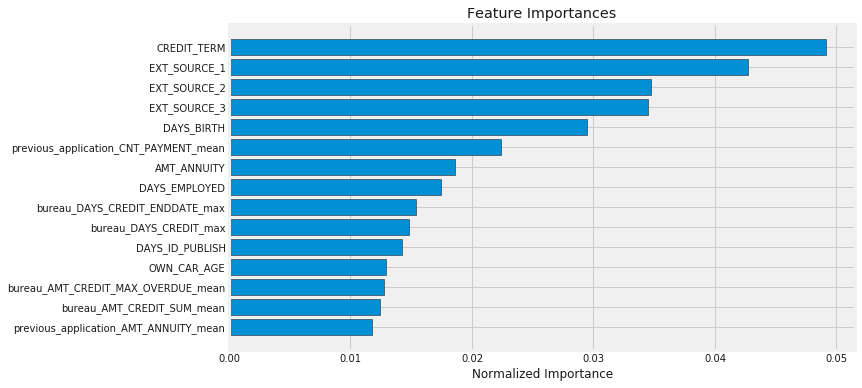

In [132]:
def plot_feature_importances(df):
    
    # Sort features according to importance
    df = df.sort_values('importance', ascending = False).reset_index()
    
    # Normalize the feature importances to add up to one
    df['importance_normalized'] = df['importance'] / df['importance'].sum()

    # Make a horizontal bar chart of feature importances
    plt.figure(figsize = (10, 6))
    ax = plt.subplot()
    
    # Need to reverse the index to plot most important on top
    ax.barh(list(reversed(list(df.index[:15]))), 
            df['importance_normalized'].head(15), 
            align = 'center', edgecolor = 'k')
    
    # Set the yticks and labels
    ax.set_yticks(list(reversed(list(df.index[:15]))))
    ax.set_yticklabels(df['feature'].head(15))
    
    # Plot labeling
    plt.xlabel('Normalized Importance'); plt.title('Feature Importances')
    plt.show()
    
    return df
fi_sorted = plot_feature_importances(fi)

In [133]:
submission.to_csv('baseline_lgb2.csv', index = False)